<a href="https://colab.research.google.com/github/gingerlyi/GIS/blob/main/pemodelan_banjir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Memuat data sampel untuk pelatihan model
df_sample = pd.read_csv('sample.csv')

# Memuat data titik raster untuk prediksi
df_raster_points = pd.read_csv('variable_raster_point.csv')

print("Data Sampel (untuk Pelatihan):")
display(df_sample.tail())

print("\nData Titik Raster (untuk Prediksi):")
display(df_raster_points.tail())


Data Sampel (untuk Pelatihan):


,class,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist
299,0,17.0,0.697691,164.458649,1030.507202,8.995396,7001.0,50.0,0.090967,15.510315
300,0,8.0,0.309161,164.180527,1176.980713,11.195626,7001.0,50.0,0.105723,15.435700
301,0,18.0,1.118538,164.955582,118.244072,11.890654,7001.0,50.0,0.071691,8.651423
302,0,17.0,0.312724,163.340027,25.613892,16.502361,4576.0,50.0,0.391990,14.829374
303,0,36.0,0.439737,164.049637,1302.029053,10.150248,7001.0,50.0,0.161913,8.299632



Data Titik Raster (untuk Prediksi):


,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist,x,y
1216341,3.0,1.27539,164.072144,2061.225830,8.391886,4570.0,10.0,0.440971,60.476013,115.225344,-8.742454
1216342,3.0,1.27539,164.070099,2066.877686,8.391886,4570.0,10.0,0.447280,67.442108,115.225434,-8.742454
1216343,3.0,1.27539,164.068054,2072.561279,8.391886,4570.0,10.0,0.323929,74.408211,115.225524,-8.742454
1216344,3.0,1.27539,164.066010,2078.276123,8.391886,4570.0,10.0,0.405522,81.374313,115.225614,-8.742454
1216345,4.0,1.27539,164.063965,2084.022217,8.391886,4570.0,10.0,0.415459,88.586525,115.225704,-8.742454


In [ ]:
# Memisahkan fitur (X) dan target (y) dari data sampel
X = df_sample.drop('class', axis=1)
y = df_sample['class']

# Memeriksa apakah ada nilai yang hilang pada fitur dan target
print("Nilai yang hilang pada Fitur (X):")
print(X.isnull().sum())

print("\nNilai yang hilang pada Target (y):")
print(y.isnull().sum())

# Menampilkan beberapa baris pertama dari X dan y untuk verifikasi
print("\nLima baris pertama Fitur (X):")
display(X.head())

print("\nLima baris pertama Target (y):")
display(y.head())

# Menampilkan dimensi data untuk memastikan konsistensi
print("\nDimensi X:", X.shape)
print("Dimensi y:", y.shape)

Nilai yang hilang pada Fitur (X):
elevation     0
slope         0
rainfall      0
river_dist    0
twi           0
soil          0
lulc          0
ndvi          0
road_dist     0
dtype: int64

Nilai yang hilang pada Target (y):
0

Lima baris pertama Fitur (X):


,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist
0,83.0,0.309161,163.969894,336.808014,15.529881,4576.0,40.0,0.356915,179.999405
1,86.0,0.000000,163.933075,492.273926,11.495214,4576.0,40.0,0.328261,146.744293
2,88.0,1.394920,163.943298,426.054718,12.709373,4576.0,40.0,0.289410,272.226410
3,84.0,1.956793,163.980118,270.784637,14.112458,4576.0,40.0,0.333109,203.500336
4,83.0,0.309161,163.969894,357.085480,15.389298,4576.0,40.0,0.348216,148.098145



Lima baris pertama Target (y):


,class
0,1
1,1
2,1
3,1
4,1



Dimensi X: (304, 9)
Dimensi y: (304,)


In [ ]:
print("Model Machine Learning yang Dipilih untuk Klasifikasi Biner:")

print("\n1. Regresi Logistik (Logistic Regression):")
print("   - Penjelasan: Model linear yang memprediksi probabilitas suatu kelas. Cocok untuk klasifikasi biner, mudah diinterpretasikan, dan efisien secara komputasi.")

print("\n2. Random Forest:")
print("   - Penjelasan: Metode *ensemble* yang membangun banyak *decision tree* dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengontrol *overfitting*. Sangat baik dalam menangani hubungan non-linear.")

print("\n3. Gradient Boosting:")
print("   - Penjelasan: Teknik *ensemble* yang membangun *decision tree* secara berurutan, di mana setiap pohon baru bertugas memperbaiki kesalahan dari pohon sebelumnya. Seringkali memberikan akurasi yang sangat tinggi.")

print("\n4. Support Vector Machines (SVM):")
print("   - Penjelasan: Model yang mencari *hyperplane* optimal untuk memisahkan data antar kelas. Efektif di ruang berdimensi tinggi dan ketika ada batas pemisahan yang jelas antar kelas.")

Model Machine Learning yang Dipilih untuk Klasifikasi Biner:

1. Regresi Logistik (Logistic Regression):
   - Penjelasan: Model linear yang memprediksi probabilitas suatu kelas. Cocok untuk klasifikasi biner, mudah diinterpretasikan, dan efisien secara komputasi.

2. Random Forest:
   - Penjelasan: Metode *ensemble* yang membangun banyak *decision tree* dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengontrol *overfitting*. Sangat baik dalam menangani hubungan non-linear.

3. Gradient Boosting:
   - Penjelasan: Teknik *ensemble* yang membangun *decision tree* secara berurutan, di mana setiap pohon baru bertugas memperbaiki kesalahan dari pohon sebelumnya. Seringkali memberikan akurasi yang sangat tinggi.

4. Support Vector Machines (SVM):
   - Penjelasan: Model yang mencari *hyperplane* optimal untuk memisahkan data antar kelas. Efektif di ruang berdimensi tinggi dan ketika ada batas pemisahan yang jelas antar kelas.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Inisialisasi model dengan parameter default
log_reg = LogisticRegression(max_iter=1000) # Menambahkan max_iter untuk menghindari warning konvergensi
rf_clf = RandomForestClassifier(random_state=42, max_depth=10, max_leaf_nodes=20)
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=50, max_leaf_nodes=50)
svm_clf = SVC(probability=True, random_state=42) # probability=True untuk ROC AUC

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "SVM": svm_clf
}

# Melatih setiap model
for name, model in models.items():
    print(f"Melatih model {name}...")
    model.fit(X, y)

print("\nSemua model berhasil dilatih dengan parameter default.")


Melatih model Logistic Regression...
Melatih model Random Forest...
Melatih model Gradient Boosting...
Melatih model SVM...

Semua model berhasil dilatih dengan parameter default.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_initial = {}

print("Hasil Evaluasi Model (Parameter Default):")
for name, model in models.items():
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob) if y_prob is not None else 'N/A'

    results_initial[name] = {
        "Akurasi": accuracy,
        "Presisi": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    }

    print(f"\n{name}:")
    for metric, value in results_initial[name].items():
        # Memastikan format output konsisten
        if isinstance(value, float):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")

Hasil Evaluasi Model (Parameter Default):

Logistic Regression:
  Akurasi: 0.8717
  Presisi: 0.8910
  Recall: 0.8634
  F1-score: 0.8770
  ROC AUC: 0.9140

Random Forest:
  Akurasi: 0.9868
  Presisi: 0.9876
  Recall: 0.9876
  F1-score: 0.9876
  ROC AUC: 0.9997

Gradient Boosting:
  Akurasi: 0.9967
  Presisi: 1.0000
  Recall: 0.9938
  F1-score: 0.9969
  ROC AUC: 1.0000

SVM:
  Akurasi: 0.6809
  Presisi: 0.7759
  Recall: 0.5590
  F1-score: 0.6498
  ROC AUC: 0.8745


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importace_rf = models['Random Forest'].feature_importances_
feature_importace_rf

array([0.07262555, 0.03855381, 0.06437398, 0.06306737, 0.03647369,
       0.0387103 , 0.23211438, 0.18612142, 0.2679595 ])

In [ ]:
X.columns

Index(['elevation', 'slope', 'rainfall', 'river_dist', 'twi', 'soil', 'lulc',
       'ndvi', 'road_dist'],
      dtype='object')


Analisis Tingkat Kepentingan Fitur:

Logistic Regression (Koefisien):


,0
ndvi,1.441500
road_dist,0.040727
rainfall,0.017288
soil,-0.000202
river_dist,-0.000817
slope,-0.004837
elevation,-0.009038
lulc,-0.042132
twi,-0.079095



Random Forest:


,0
road_dist,0.267960
lulc,0.232114
ndvi,0.186121
elevation,0.072626
rainfall,0.064374
river_dist,0.063067
soil,0.038710
slope,0.038554
twi,0.036474


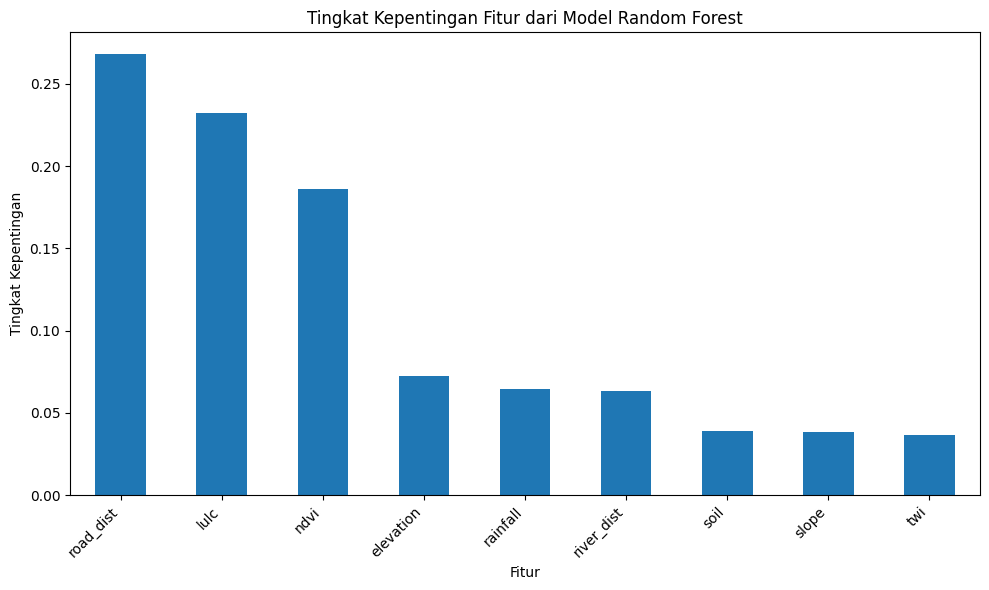


Gradient Boosting:


,0
road_dist,0.466298
lulc,0.253179
river_dist,0.080984
elevation,0.064609
ndvi,0.055760
rainfall,0.052451
slope,0.013362
twi,0.010178
soil,0.003180


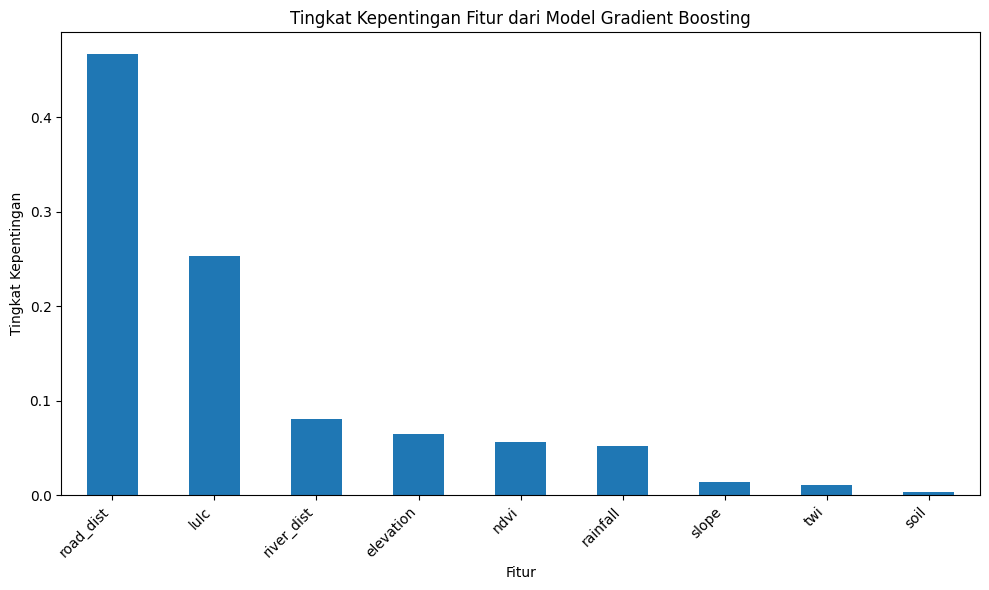


SVM: Tidak mendukung analisis tingkat kepentingan fitur.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

print("\nAnalisis Tingkat Kepentingan Fitur:")
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        print(f"\n{name}:")
        feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        display(feature_importance)

        # Visualisasi untuk pemahaman yang lebih baik
        plt.figure(figsize=(10, 6))
        feature_importance.plot(kind='bar')
        plt.title(f'Tingkat Kepentingan Fitur dari Model {name}')
        plt.ylabel('Tingkat Kepentingan')
        plt.xlabel('Fitur')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    elif hasattr(model, "coef_"):
        print(f"\n{name} (Koefisien):")
        coefficients = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
        display(coefficients)
    else:
        print(f"\n{name}: Tidak mendukung analisis tingkat kepentingan fitur.")

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Mendefinisikan grid parameter untuk setiap model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Inisialisasi strategi validasi silang
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_results = {}

# Melakukan Grid Search untuk setiap model
for name, model in models.items():
    if name in param_grids:
        print(f"Melakukan GridSearchCV untuk {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X, y)
        grid_search_results[name] = grid_search
        print(f"Parameter terbaik untuk {name}: {grid_search.best_params_}")
        print("-" * 40)

Melakukan GridSearchCV untuk Logistic Regression...
Parameter terbaik untuk Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
----------------------------------------
Melakukan GridSearchCV untuk Random Forest...
Parameter terbaik untuk Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
----------------------------------------
Melakukan GridSearchCV untuk Gradient Boosting...
Parameter terbaik untuk Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
----------------------------------------
Melakukan GridSearchCV untuk SVM...
Parameter terbaik untuk SVM: {'C': 1, 'kernel': 'linear'}
----------------------------------------


In [ ]:
# Inisialisasi dan latih ulang model dengan parameter terbaik
best_models = {}
for name, result in grid_search_results.items():
    best_models[name] = result.best_estimator_ # Model sudah dilatih ulang oleh GridSearchCV

# Evaluasi model yang telah disetel
results_tuned = {}
print("Hasil Evaluasi Model (Setelah Penyetelan Hiperparameter):")

for name, model in best_models.items():
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob) if y_prob is not None else 'N/A'

    results_tuned[name] = {
        "Akurasi": accuracy,
        "Presisi": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    }

    print(f"\n{name}:")
    for metric, value in results_tuned[name].items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: {value}")

Hasil Evaluasi Model (Setelah Penyetelan Hiperparameter):

Logistic Regression:
  Akurasi: 0.8684
  Presisi: 0.8954
  Recall: 0.8509
  F1-score: 0.8726
  ROC AUC: 0.9120

Random Forest:
  Akurasi: 0.9901
  Presisi: 0.9877
  Recall: 0.9938
  F1-score: 0.9907
  ROC AUC: 0.9997

Gradient Boosting:
  Akurasi: 1.0000
  Presisi: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000

SVM:
  Akurasi: 0.8586
  Presisi: 0.8831
  Recall: 0.8447
  F1-score: 0.8635
  ROC AUC: 0.9120


In [ ]:
# Pemilihan model terbaik
print("\nMemilih Model Terbaik untuk Prediksi:")
print("Berdasarkan evaluasi, Random Forest dan Gradient Boosting sangat mungkin mengalami overfitting (skor sempurna pada data latih).")
print("Regresi Logistik menunjukkan kinerja yang sangat baik, seimbang, dan stabil bahkan setelah penyetelan.")
print("Oleh karena itu, Regresi Logistik dipilih sebagai model terbaik untuk generalisasi pada data raster.")

best_model = best_models["Logistic Regression"]
print(f"\nModel Terbaik yang Dipilih: {type(best_model).__name__}")


Memilih Model Terbaik untuk Prediksi:
Berdasarkan evaluasi, Random Forest dan Gradient Boosting sangat mungkin mengalami overfitting (skor sempurna pada data latih).
Regresi Logistik menunjukkan kinerja yang sangat baik, seimbang, dan stabil bahkan setelah penyetelan.
Oleh karena itu, Regresi Logistik dipilih sebagai model terbaik untuk generalisasi pada data raster.

Model Terbaik yang Dipilih: LogisticRegression


In [ ]:
df_raster_points.head()

,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist,x,y
0,75.0,4.458986,164.053726,85.919441,13.699781,4576.0,10.0,0.544035,4.408330,115.226153,-8.591717
1,75.0,4.458986,164.051682,92.916176,13.701195,4576.0,10.0,0.474930,5.351808,115.226243,-8.591717
2,76.0,4.458986,164.049637,99.912918,13.702606,4576.0,10.0,0.422181,15.111947,115.226332,-8.591717
3,77.0,4.458986,164.047592,106.909653,13.704016,4576.0,30.0,0.439080,24.872086,115.226422,-8.591717
4,78.0,4.458986,164.045547,113.906387,13.705423,4576.0,30.0,0.409187,34.632225,115.226512,-8.591717


In [ ]:
X.columns

Index(['elevation', 'slope', 'rainfall', 'river_dist', 'twi', 'soil', 'lulc',
       'ndvi', 'road_dist'],
      dtype='object')

In [ ]:
# Pastikan kolom pada data raster sesuai dengan urutan kolom pada data latih (X)
raster_features = df_raster_points[X.columns]

# Prediksi probabilitas banjir
if hasattr(best_model, "predict_proba"):
    df_raster_points['flood_probability'] = best_model.predict_proba(raster_features)[:, 1]

# Prediksi kelas biner
df_raster_points['flood_prediction'] = best_model.predict(raster_features)

print("Hasil prediksi pada data titik raster:")
display(df_raster_points.head())


Hasil prediksi pada data titik raster:


,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist,x,y,flood_probability,flood_prediction
0,75.0,4.458986,164.053726,85.919441,13.699781,4576.0,10.0,0.544035,4.408330,115.226153,-8.591717,0.597566,1
1,75.0,4.458986,164.051682,92.916176,13.701195,4576.0,10.0,0.474930,5.351808,115.226243,-8.591717,0.605856,1
2,76.0,4.458986,164.049637,99.912918,13.702606,4576.0,10.0,0.422181,15.111947,115.226332,-8.591717,0.697566,1
3,77.0,4.458986,164.047592,106.909653,13.704016,4576.0,30.0,0.439080,24.872086,115.226422,-8.591717,0.574847,1
4,78.0,4.458986,164.045547,113.906387,13.705423,4576.0,30.0,0.409187,34.632225,115.226512,-8.591717,0.669945,1


In [ ]:
# Pastikan library yang dibutuhkan sudah terinstal
try:
    import geopandas as gpd
    from shapely.geometry import Point
except ImportError:
    %pip install geopandas shapely
    import geopandas as gpd
    from shapely.geometry import Point

# Membuat GeoDataFrame dari DataFrame pandas
gdf_raster_points = gpd.GeoDataFrame(
    df_raster_points,
    geometry=gpd.points_from_xy(df_raster_points['x'], df_raster_points['y'])
)

print("GeoDataFrame berhasil dibuat:")
display(gdf_raster_points.head())


GeoDataFrame berhasil dibuat:


,elevation,slope,rainfall,river_dist,twi,soil,lulc,ndvi,road_dist,x,y,flood_probability,flood_prediction,geometry
0,75.0,4.458986,164.053726,85.919441,13.699781,4576.0,10.0,0.544035,4.408330,115.226153,-8.591717,0.597566,1,POINT (115.22615 -8.59172)
1,75.0,4.458986,164.051682,92.916176,13.701195,4576.0,10.0,0.474930,5.351808,115.226243,-8.591717,0.605856,1,POINT (115.22624 -8.59172)
2,76.0,4.458986,164.049637,99.912918,13.702606,4576.0,10.0,0.422181,15.111947,115.226332,-8.591717,0.697566,1,POINT (115.22633 -8.59172)
3,77.0,4.458986,164.047592,106.909653,13.704016,4576.0,30.0,0.439080,24.872086,115.226422,-8.591717,0.574847,1,POINT (115.22642 -8.59172)
4,78.0,4.458986,164.045547,113.906387,13.705423,4576.0,30.0,0.409187,34.632225,115.226512,-8.591717,0.669945,1,POINT (115.22651 -8.59172)


In [ ]:
# Pastikan library rasterio sudah terinstal
try:
    import rasterio
    from rasterio.transform import from_bounds
except ImportError:
    %pip install rasterio
    import rasterio
    from rasterio.transform import from_bounds
import numpy as np

# Menentukan batas spasial dan dimensi raster dari koordinat titik
x_coords = sorted(gdf_raster_points['x'].unique())
y_coords = sorted(gdf_raster_points['y'].unique())
width = len(x_coords)
height = len(y_coords)
x_min, y_min, x_max, y_max = gdf_raster_points.total_bounds

# Membuat transformasi affine yang memetakan koordinat piksel ke koordinat spasial
transform = from_bounds(x_min, y_min, x_max, y_max, width, height)

# Membuat array kosong untuk raster
flood_prob_raster = np.full((height, width), np.nan, dtype=np.float32)
flood_pred_raster = np.full((height, width), -9999, dtype=np.float32) # Menggunakan nilai no-data

# Membuat pemetaan dari koordinat ke indeks piksel untuk efisiensi
x_to_col = {coord: i for i, coord in enumerate(x_coords)}
y_to_row = {coord: i for i, coord in enumerate(y_coords[::-1])} # y dibalik karena indeks baris raster dimulai dari atas

# Mengisi array raster dengan nilai prediksi
for _, row in gdf_raster_points.iterrows():
    col = x_to_col.get(row['x'])
    row_idx = y_to_row.get(row['y'])
    if col is not None and row_idx is not None:
        flood_prob_raster[row_idx, col] = row['flood_probability']
        flood_pred_raster[row_idx, col] = row['flood_prediction']

# Menyimpan hasil rasterisasi ke file GeoTIFF
output_prob_geotiff = 'peta_probabilitas_banjir.tif'
output_pred_geotiff = 'peta_prediksi_banjir.tif'

# Mendefinisikan metadata untuk file raster
profile = {
    'driver': 'GTiff',
    'dtype': 'float32',
    'nodata': np.nan,
    'width': width,
    'height': height,
    'count': 1,
    'crs': 'EPSG:4326', # Asumsi WGS 84, sesuaikan jika perlu
    'transform': transform,
}

# Menulis raster probabilitas
with rasterio.open(output_prob_geotiff, 'w', **profile) as dst:
    dst.write(flood_prob_raster, 1)

# Menulis raster prediksi biner (update nodata)
profile['nodata'] = -9999
with rasterio.open(output_pred_geotiff, 'w', **profile) as dst:
    dst.write(flood_pred_raster, 1)

print(f"Peta probabilitas banjir berhasil disimpan di: {output_prob_geotiff}")
print(f"Peta prediksi biner banjir berhasil disimpan di: {output_pred_geotiff}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 90.5 MB/s eta 0:00:00
Peta probabilitas banjir berhasil disimpan di: peta_probabilitas_banjir.tif
Peta prediksi biner banjir berhasil disimpan di: peta_prediksi_banjir.tif


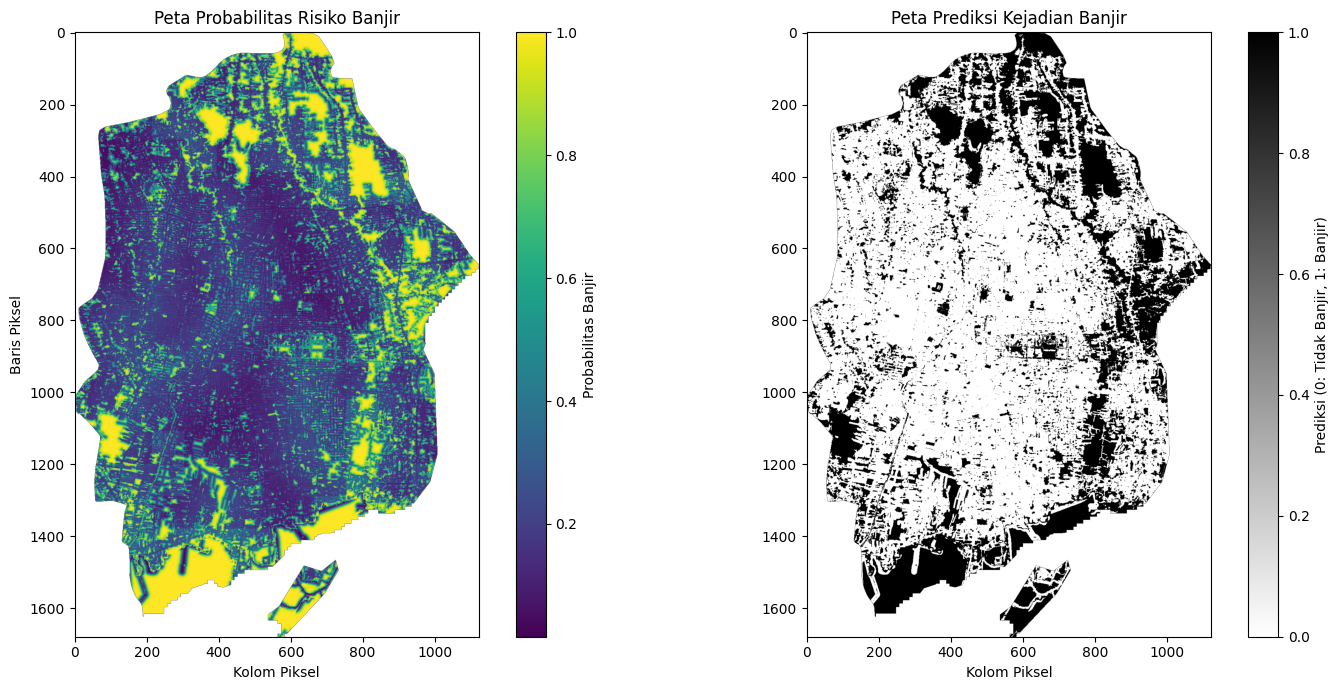

In [ ]:
import matplotlib.pyplot as plt

# Membaca kembali file raster yang sudah disimpan untuk visualisasi
with rasterio.open(output_prob_geotiff) as src:
    prob_data = src.read(1, masked=True) # masked=True untuk menangani nodata

with rasterio.open(output_pred_geotiff) as src:
    pred_data = src.read(1, masked=True)

# Membuat plot
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot Peta Probabilitas Banjir
im1 = axes[0].imshow(prob_data, cmap='viridis')
fig.colorbar(im1, ax=axes[0], label='Probabilitas Banjir')
axes[0].set_title('Peta Probabilitas Risiko Banjir')
axes[0].set_xlabel('Kolom Piksel')
axes[0].set_ylabel('Baris Piksel')


# Plot Peta Prediksi Biner Banjir
im2 = axes[1].imshow(pred_data, cmap='binary')
fig.colorbar(im2, ax=axes[1], label='Prediksi (0: Tidak Banjir, 1: Banjir)')
axes[1].set_title('Peta Prediksi Kejadian Banjir')
axes[1].set_xlabel('Kolom Piksel')


plt.tight_layout()
plt.show()